RAJ RAUNAK KUMAR 20HCS4148

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Custom linear regression class
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        # Initialize parameters
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.beta = None

    def fit(self, X, y):
        # Gradient descent to fit the model
        m, n = X.shape
        X = np.c_[np.ones(m), X]  # Add intercept column
        self.beta = np.zeros(n + 1)  # Initialize coefficients

        for _ in range(self.iterations):
            predictions = np.dot(X, self.beta)  # Linear combination
            error = predictions - y  # Prediction error
            gradient = np.dot(X.T, error) / m  # Gradient calculation
            self.beta -= self.learning_rate * gradient  # Gradient descent step

    def predict(self, X):
        # Predict using the trained model
        m = X.shape[0]
        X = np.c_[np.ones(m), X]  # Add intercept column
        return np.dot(X, self.beta)  # Linear combination for predictions


In [2]:
# Data preparation
data = {
    'Feature': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Simple linear data
    'Target': [2.1, 3.9, 6.0, 8.1, 9.8, 11.2, 13.3, 15.2, 16.9, 18.7]  # Approximate linear relationship
}

# Create a DataFrame from the data
import pandas as pd
df = pd.DataFrame(data)  # DataFrame banana

# Split into training and testing datasets (80-20 split)
X = df[['Feature']]  # Features
y = df['Target']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80-20 split


In [3]:
# Custom linear regression model ko train karna
model = LinearRegressionGD(learning_rate=0.01, iterations=1000)  # Custom class ka instance
model.fit(X_train, y_train)  # Model ko train karna

# Predictions generate karna
y_pred = model.predict(X_test)  # Testing set par predictions

# Mean Squared Error (MSE) aur R2 ko calculate karna
mse = mean_squared_error(y_test, y_pred)  # MSE calculate karna
r2 = r2_score(y_test, y_pred)  # R2 value calculate karna

print(f"Mean Squared Error (MSE): {mse}")  # MSE ko print karna
print(f"R-squared (R2): {r2}")  # R2 ko print karna


Mean Squared Error (MSE): 0.02647977797823532
R-squared (R2): 0.9993732596928229


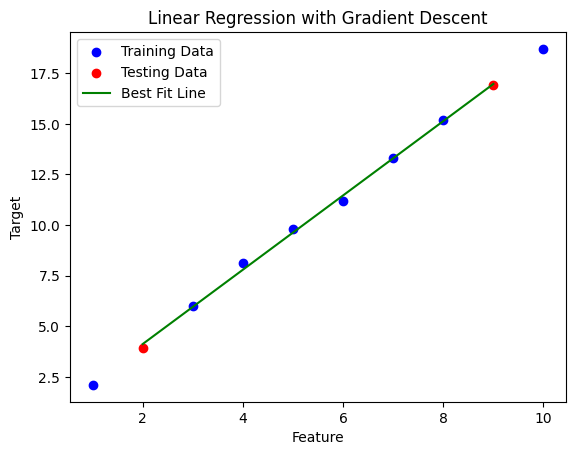

In [4]:
# Scatter plot with best fit line
plt.scatter(X_train, y_train, label='Training Data', color='blue')  # Training data ka scatter plot
plt.scatter(X_test, y_test, label='Testing Data', color='red')  # Testing data ka scatter plot
plt.plot(X_test, y_pred, color='green', label='Best Fit Line')  # Best fit line ko plot karna
plt.xlabel('Feature')  # X-axis ka label
plt.ylabel('Target')  # Y-axis ka label
plt.title('Linear Regression with Gradient Descent')  # Plot ka title
plt.legend()  # Legend ko show karna
plt.show()  # Graph ko display karna
